# Testing Altair-Saver

<a href="https://colab.research.google.com/github/altair-viz/altair_saver/blob/master/AltairSaver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates the installation and use of [altair-saver](http://github.com/altair-viz/altair_saver). The following was tested in Colab.



In [1]:
!pip install -q git+https://github.com/altair-viz/altair_saver.git

     |████████████████████████████████| 286kB 3.8MB/s 
     |████████████████████████████████| 911kB 9.0MB/s 


## Setup Selenium + Chromedriver

In [2]:
!apt-get -qq install chromium-chromedriver

Selecting previously unselected package chromium-codecs-ffmpeg-extra.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../chromium-codecs-ffmpeg-extra_79.0.3945.79-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-codecs-ffmpeg-extra (79.0.3945.79-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-browser.
Preparing to unpack .../chromium-browser_79.0.3945.79-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-browser (79.0.3945.79-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-browser-l10n.
Preparing to unpack .../chromium-browser-l10n_79.0.3945.79-0ubuntu0.18.04.1_all.deb ...
Unpacking chromium-browser-l10n (79.0.3945.79-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-chromedriver.
Preparing to unpack .../chromium-chromedriver_79.0.3945.79-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-chromedriver (79.0.3945.79-0ubuntu0.18.04.1) ...
Setting up chromium-codecs-ffmpeg-extra

## Setup npm and the Vega CLI

In [3]:
!npm install --silent vega-lite vega-cli canvas

[canvas] Success: "/content/node_modules/canvas/build/Release/canvas.node" is installed via remote
+ vega-cli@5.9.0
+ canvas@2.6.1
+ vega-lite@4.0.2
added 177 packages from 84 contributors in 10.934s


## Create and save a chart

In [4]:
import altair as alt
from vega_datasets import data
cars = data.cars.url

chart = alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon:Q', bin=True),
  y='count()',
)

chart.display()

alt.Chart(...)

In [5]:
from altair_saver import save
for fmt in ['json', 'vg.json', 'html', 'png', 'svg', 'pdf']:
  save(chart, f'chart.{fmt}')
!ls -lh chart.*

-rw-r--r-- 1 root root  788 Jan  3 18:17 chart.html
-rw-r--r-- 1 root root  464 Jan  3 18:17 chart.json
-rw-r--r-- 1 root root  15K Jan  3 18:17 chart.pdf
-rw-r--r-- 1 root root  17K Jan  3 18:17 chart.png
-rw-r--r-- 1 root root  11K Jan  3 18:17 chart.svg
-rw-r--r-- 1 root root 4.0K Jan  3 18:17 chart.vg.json


## View saved charts

Here we use a variety of IPython display mechanisms to load and display the saved charts.

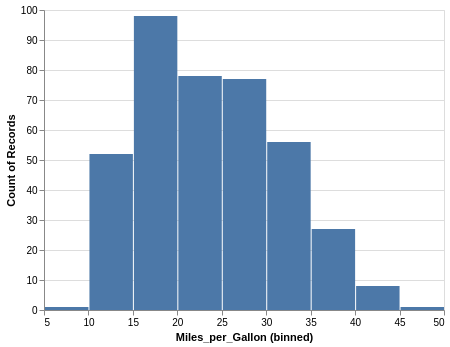

In [6]:
from PIL import Image
Image.open("chart.png")

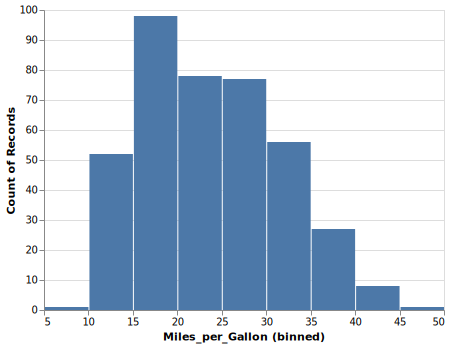

In [7]:
from IPython.display import display, SVG
with open("chart.svg") as f:
  display(SVG(f.read()))

In [8]:
import json

with open('chart.json') as f:
  display(alt.VegaLite(json.load(f)))

In [9]:
import json
from altair import vega
vega.renderers.enable('colab')

with open('chart.vg.json') as f:
  display(vega.Vega(json.load(f)))

In [10]:
from IPython.display import HTML

with open("chart.html") as f:
  html = f.read()
HTML(html)

In [11]:
from IPython.display import HTML
import base64

with open("chart.pdf", 'rb') as f:
  pdf_base64 = base64.b64encode(f.read()).decode()

HTML(f'Right-click and choose "Open In New Tab": <a download="chart.pdf" href="data:application/pdf;base64,{pdf_base64}">chart.pdf</a>')

## Renderers

Alternatively, you can enable an altair-viewer renderer and display the chart within a notebook as a specific type or set of types.

For example, the following encodes both the vega-lite custom mimetype (which is supported by JupyterLab and other frontends via custom frontend extensions), as well as a PNG fallback that will be displayed in other environments:

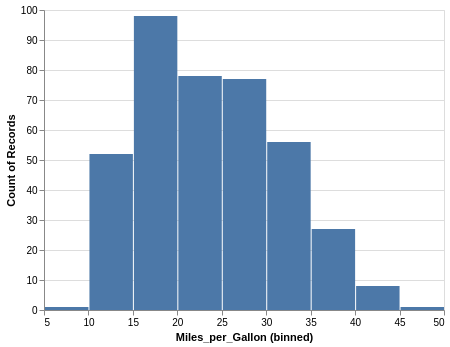

In [12]:
alt.renderers.enable('altair_saver', fmts=['vega-lite', 'png'])
chart.display()

The content of the output can be confirmed by looking at the ``_repr_mimebundle_`` method, which is the special method used by IPython/Jupyter for rich rendering:

In [13]:
chart._repr_mimebundle_(include=None, exclude=None)

{'application/vnd.vegalite.v4+json': {'$schema': 'https://vega.github.io/schema/vega-lite/v4.0.0.json',
  'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
  'data': {'url': 'https://vega.github.io/vega-datasets/data/cars.json'},
  'encoding': {'x': {'bin': True,
    'field': 'Miles_per_Gallon',
    'type': 'quantitative'},
   'y': {'aggregate': 'count', 'type': 'quantitative'}},
  'mark': 'bar'},
 'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xc2\x00\x00\x01[\x08\x06\x00\x00\x00Fq\x8e\xce\x00\x00 \x00IDATx^\xed\xbd\ttV\xd5\xb9\xff\xff QdH@P0(\xb9\x10H\x08\x01\x8c\xa9\x04\xb8\x8a\xe25qj\x02X\xbdq\x00-41\xd5X\x08\xa8\x81\xa4\xb5F\xa0V\x01\x87\xe2\xd0\x0c\x82\xa8u@lo\x99\xe2\x90\x9b\x14\x10\x12L\x0c\x1a.4pU\x14\xaeP\x07T\xa8\n\nX\xc8o}\xf7\x7f\xbd\xf9Gx\x13\xde\xe99C\xde\xef^\x8b%\x86s\xf6\xf0\xd9\'\xe7s\x9e}\xce\xde\xbbCSSS\x930\x91\x00\t\x90\x00\t\x90@\x98\x12\xe8@\x11\x86i\xcf\xb3\xd9$@\x02$@\x02\x86\x00E\xc8\x0b\x81\x04H\x80\x04H \xac\tP\x84a\xdd